# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod. W tablicy `im` wskaż jeden punkt, dla którego ma zostać obliczona transformata.

(-0.5, 63.5, 63.5, -0.5)

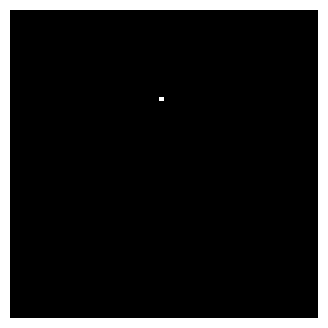

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os
import requests

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/'

fileNames = ["dom.png", "kwadraty.png", "lab112.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')


3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

In [2]:
# 3
from skimage.transform import hough_line

h, theta, rho  = hough_line(im)

In [3]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()    

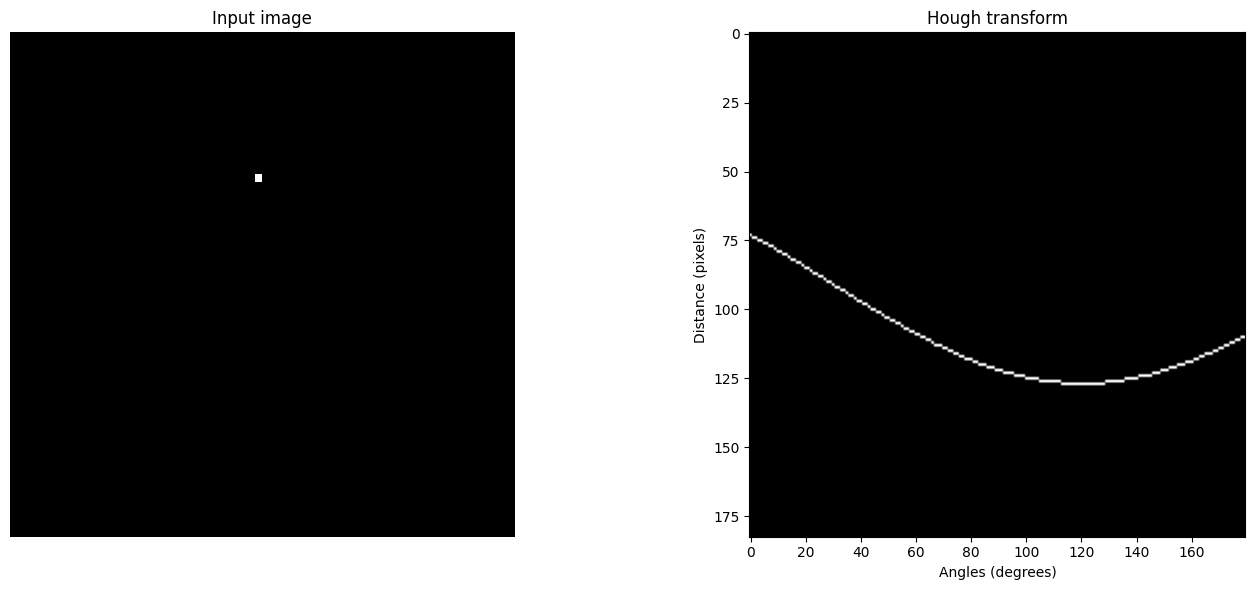

In [4]:
show_hough(h, im)

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?
6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha
7. Poeksperymentuj z różnymi układami punktów

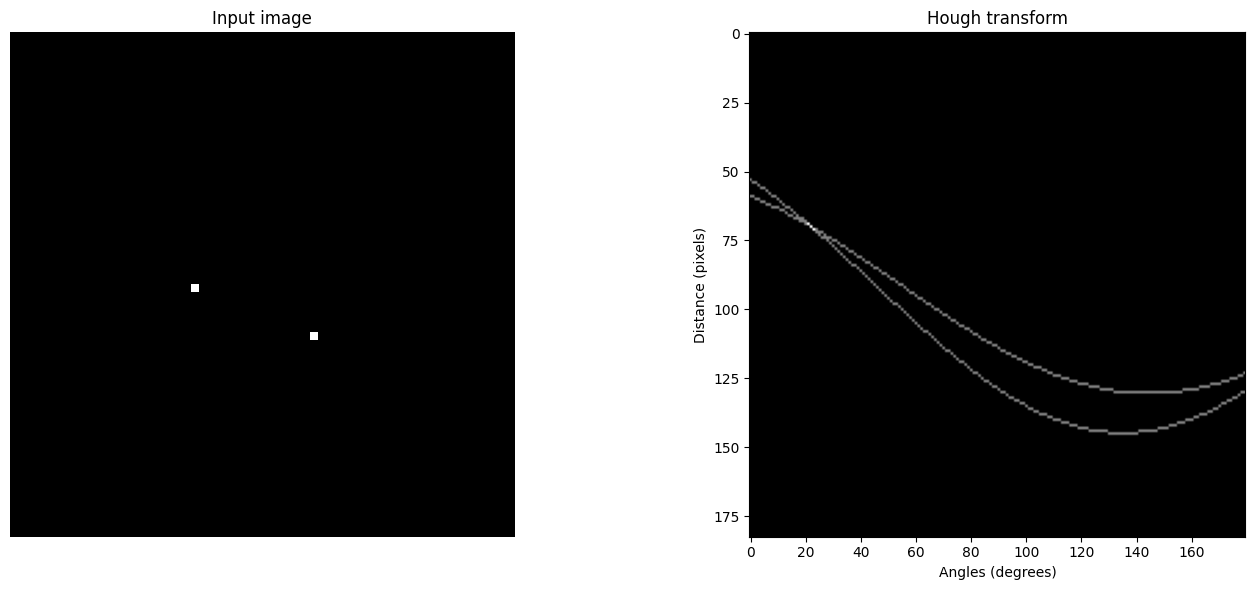

In [5]:
im2 = np.zeros((64,64), dtype=np.uint8)

im2[38,38] = 1
im2[32,23] = 1

h, theta, rho  = hough_line(im2)
show_hough(h, im2)

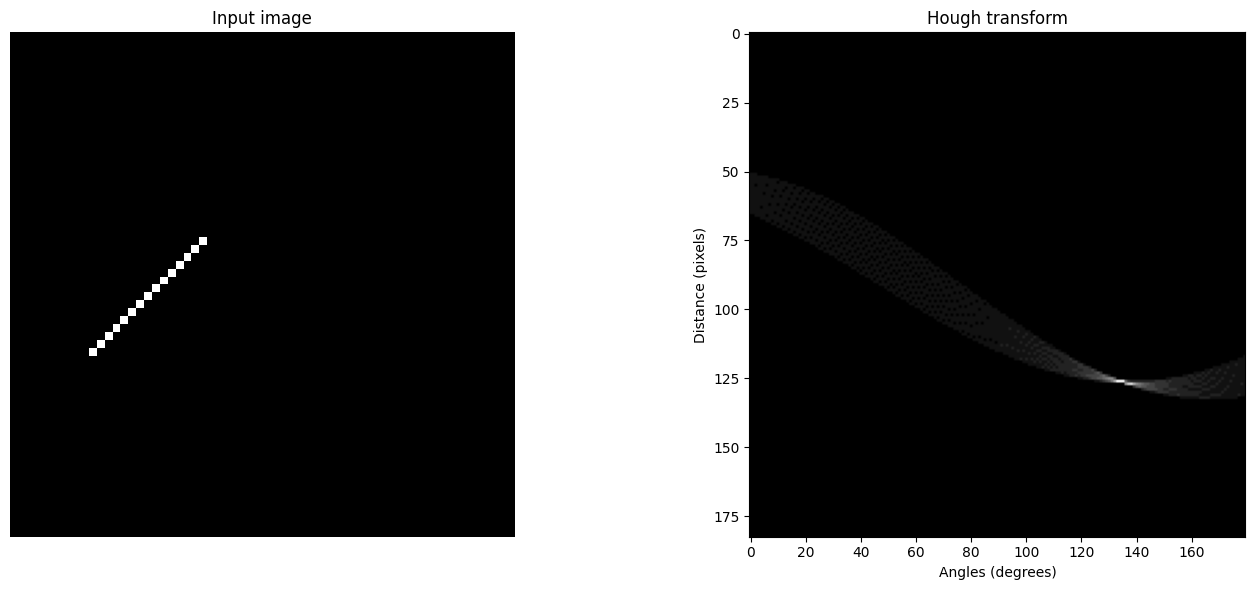

In [6]:
im3 = np.zeros((64,64), dtype=np.uint8)

for i in range(15):
    im3[40-i,10+i] = 1

h, theta, rho  = hough_line(im3)
show_hough(h, im3)

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

In [7]:
def show_imgs(imgs, imgs_titles):
    img_count = len(imgs)
    fig,axs = plt.subplots(img_count)
    for i in range(img_count):
        axs[i].imshow(imgs[i])
        axs[i].set_title(imgs_titles[i])

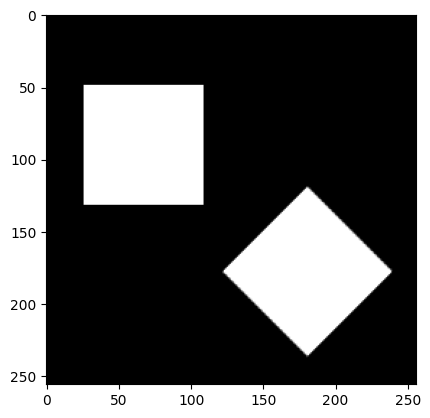

In [8]:
kwadraty = cv2.imread('kwadraty.png', 0)
plt.imshow(kwadraty, cmap='gray')

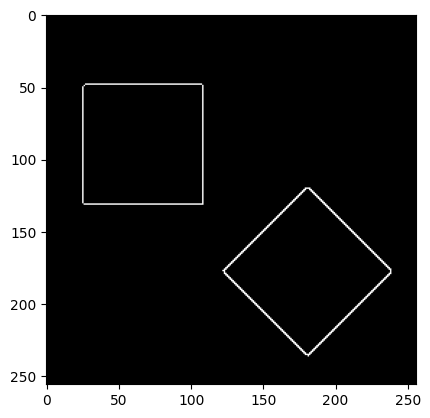

In [9]:
edge_det_kwadraty = cv2.Canny(kwadraty, 190,250, None, 3, 0)
plt.imshow(edge_det_kwadraty, cmap='gray')

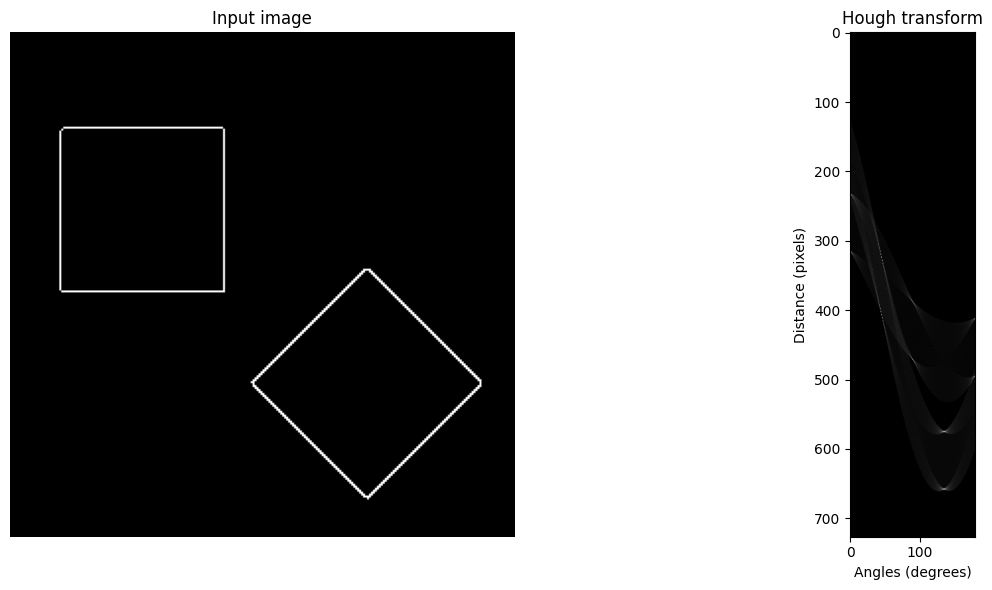

In [10]:
h, theta, rho  = hough_line(edge_det_kwadraty)
show_hough(h, edge_det_kwadraty)

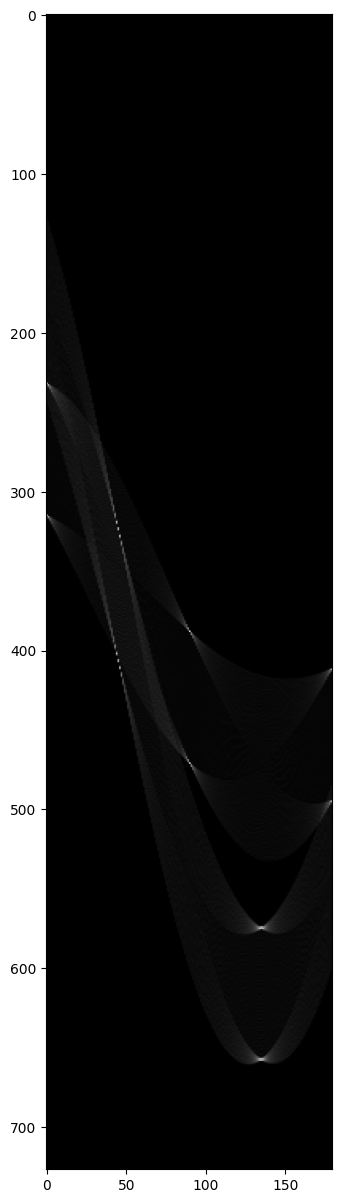

In [11]:
fig, axs = plt.subplots(1, figsize=(15,15))
axs.imshow(h, cmap='gray')

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

<code>
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(H, 'gray') # gdzie H jest przestrzenią Hougha`
</code>

Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

In [12]:
H, theta, rho  = hough_line(edge_det_kwadraty)
peaks = hough_line_peaks(H, theta, rho)

0.0 232.5
90.0 471.5
90.0 388.5
0.0 315.5
43.99999999999999 402.5
46.0 328.5
134.00000000000003 575.5
135.0 657.5


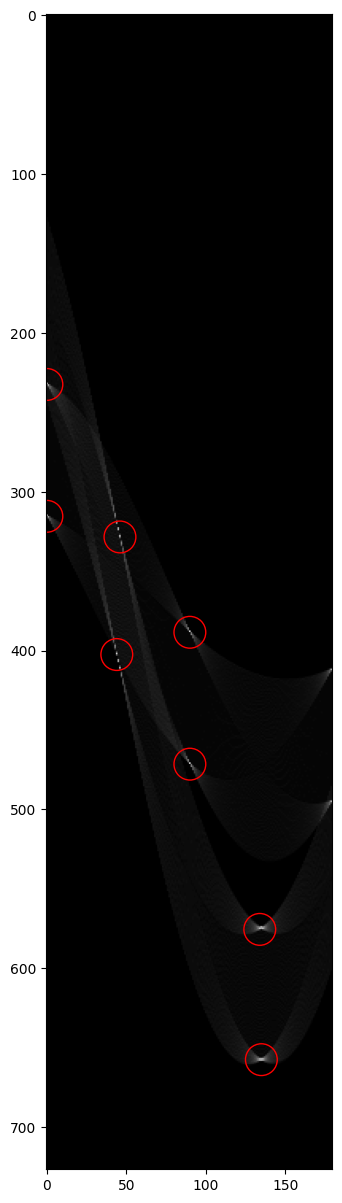

In [13]:
fig,ax = plt.subplots(1, figsize=(15,15))
ax.set_aspect('equal')

ax.imshow(H, 'gray') # gdzie H jest przestrzenią Hougha

_, maxThetas, maxRhos = hough_line_peaks(H, theta, rho)
for maxTheta, maxRho in zip(maxThetas, maxRhos):
    x = (maxTheta + np.pi/2) * H.shape[1] / np.pi
    y = maxRho + H.shape[0] / 2
    print(x,y)
    circle = plt.Circle((x, y), 10, color='r', fill=False)
    ax.add_patch(circle)

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

<code>
a = np.cos(theta)
b = np.sin(theta)
x0 = a*rho
y0 = b*rho
x1 = int(x0 + 1000*(-b))
y1 = int(y0 + 1000*(a))
x2 = int(x0 - 1000*(-b))
y2 = int(y0 - 1000*(a)) 
</code>

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

https://gist.githubusercontent.com/tomaszkacmajor/a0076e935b10427ba153276817f080c8/raw/dff46eb1ae0a2bf38e4c11fc4e0f6a59c0d630dd/houghlines_in_python_helpers.py <br>
https://medium.com/@tomasz.kacmajor/hough-lines-transform-explained-645feda072ab

In [14]:
def draw_lines(img, houghLines, color=[0, 255, 0], thickness=2):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
 
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)   

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)

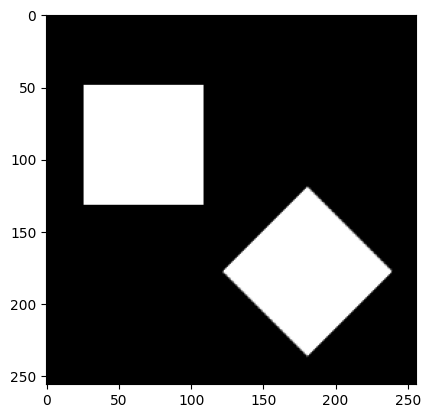

In [15]:
# load without graylevel conversion
kwadraty = cv2.imread('kwadraty.png')
plt.imshow(kwadraty, cmap='gray')

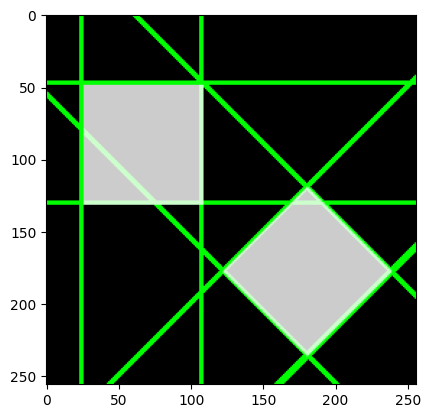

In [16]:
def hough_lines_gen(edges_image, image, rho_resolution, theta_resolution, threshold):
    hough_lines = cv2.HoughLines(edges_image, rho_resolution , theta_resolution , threshold)

    hough_lines_image = np.zeros_like(image)
    draw_lines(hough_lines_image, hough_lines)
    original_image_with_hough_lines = weighted_img(hough_lines_image,image)

    plt.imshow(original_image_with_hough_lines)
    
rho_resolution = 0.5
theta_resolution = np.pi/180
threshold = 57

hough_lines_gen(edge_det_kwadraty, kwadraty, rho_resolution, theta_resolution, threshold)

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.png". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

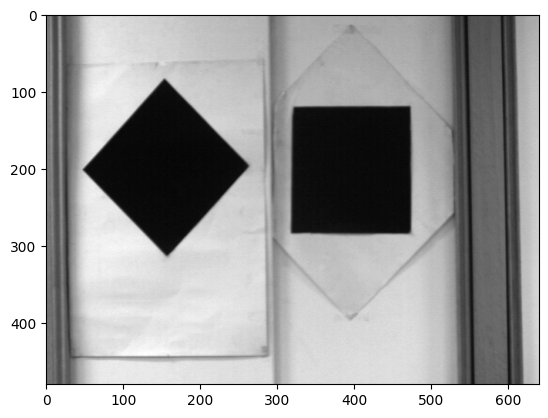

In [17]:
lab112 = cv2.imread('lab112.png',0)
plt.imshow(lab112, cmap='gray')

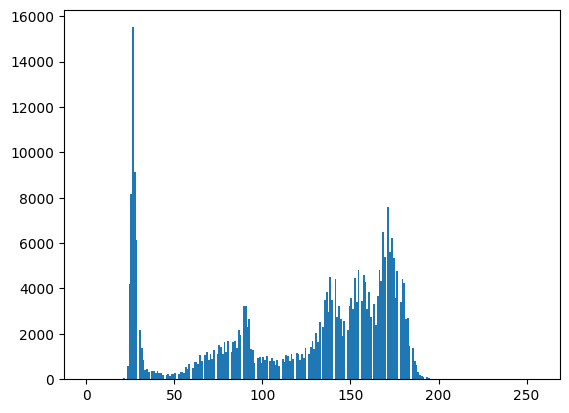

In [18]:
plt.hist(lab112.ravel(),256,[0,256]); plt.show()

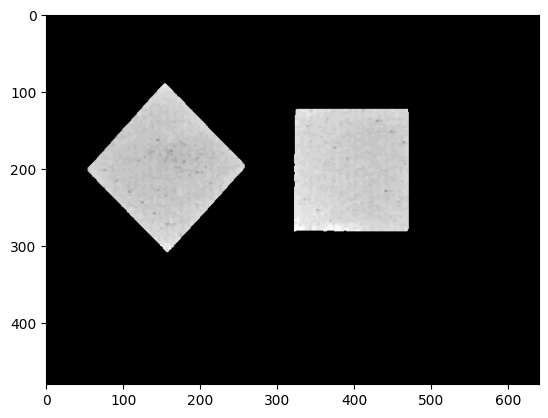

In [19]:
img = (lab112 < 37) * lab112
img = img.astype('uint8')
# mofology
img_eroded = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_RECT, (5,5)))
img_dilate = cv2.dilate(img_eroded, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)))

plt.imshow(img_dilate, cmap='gray')

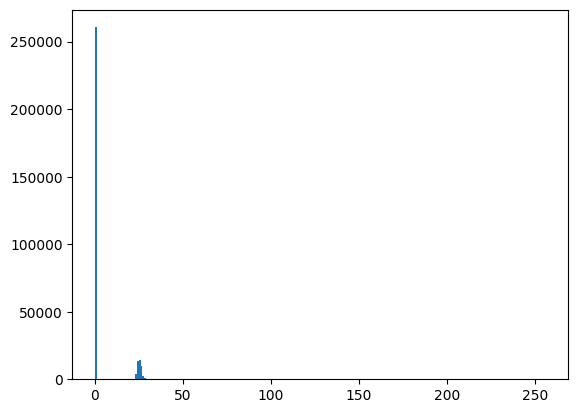

In [20]:
plt.hist(img_dilate.ravel(),256,[0,256]); plt.show()

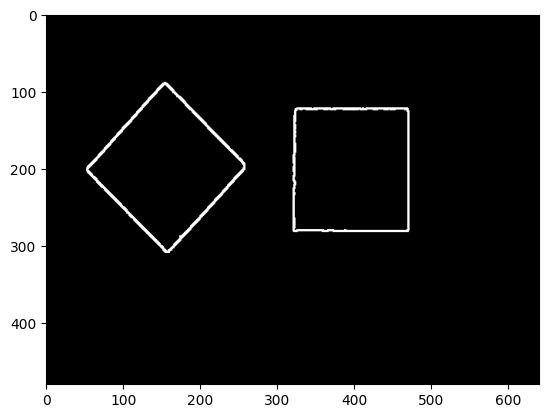

In [21]:
edges_lab112 = cv2.Canny(img_dilate, 20,150, None, 3, 0)
edges_dilate = cv2.dilate(edges_lab112, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)))
plt.imshow(edges_dilate, cmap='gray')
#TODO: poprawić, wygładzić + wyeliminować tą prostą na dole

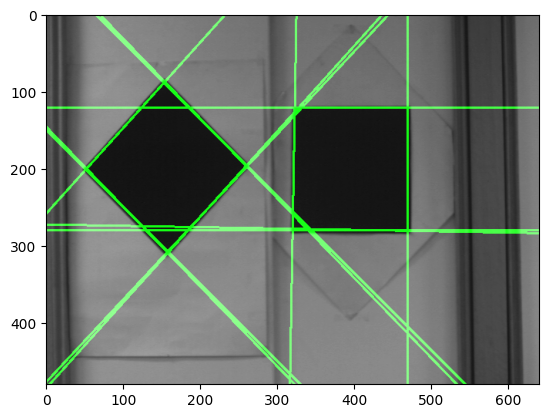

In [22]:
lab112 = cv2.imread('lab112.png')
plt.imshow(lab112, cmap='gray')


edges_image = edges_lab112
image = lab112

rho_resolution = 0.75
theta_resolution = np.pi/180
threshold = 70

hough_lines = cv2.HoughLines(edges_image, rho_resolution , theta_resolution , threshold)
 
hough_lines_image = np.zeros_like(image)
draw_lines(hough_lines_image, hough_lines)
original_image_with_hough_lines = weighted_img(hough_lines_image,image)

plt.imshow(original_image_with_hough_lines, cmap='gray')

In [23]:
H, theta, rho  = hough_line(edges_lab112)
peaks = hough_line_peaks(H, theta, rho)

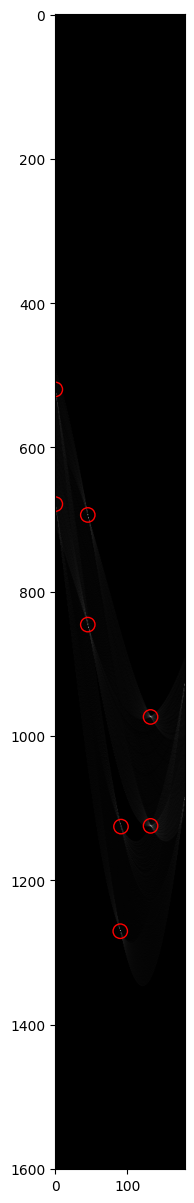

In [24]:
fig,ax = plt.subplots(1, figsize=(15,15))
ax.set_aspect('equal')

ax.imshow(H, 'gray') # gdzie H jest przestrzenią Hougha

_, maxThetas, maxRhos = hough_line_peaks(H, theta, rho)
for maxTheta, maxRho in zip(maxThetas, maxRhos):
    x = (maxTheta + np.pi/2) * H.shape[1] / np.pi
    y = maxRho + H.shape[0] / 2
    # print(x,y)
    circle = plt.Circle((x, y), 10, color='r', fill=False)
    ax.add_patch(circle)

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

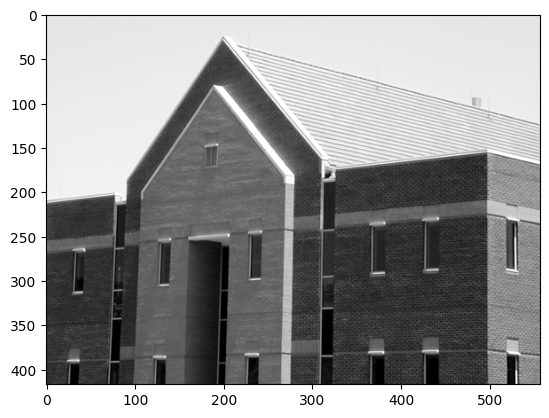

In [25]:
dom = cv2.imread('dom.png')
plt.imshow(dom, cmap='gray')

In [26]:
def draw_lines(img, linesP, color=[0, 255, 0], thickness=2):
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(img, (l[0], l[1]), (l[2], l[3]), color, thickness, cv2.LINE_AA)

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)

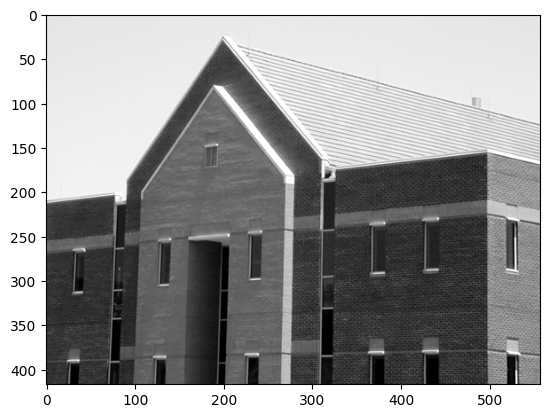

In [27]:
dom = cv2.imread('dom.png', 0)
dom_rgb = cv2.imread('dom.png')
plt.imshow(dom, cmap='gray')

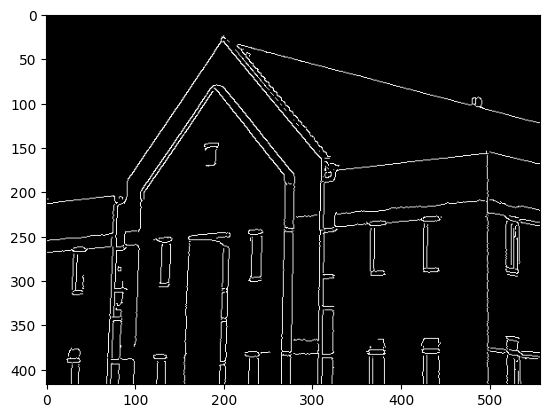

In [28]:
dom_blurr = cv2.GaussianBlur(dom, (5,5),2)
res = cv2.Canny(dom_blurr,40,90,None,3,0)
plt.imshow(res, 'gray')

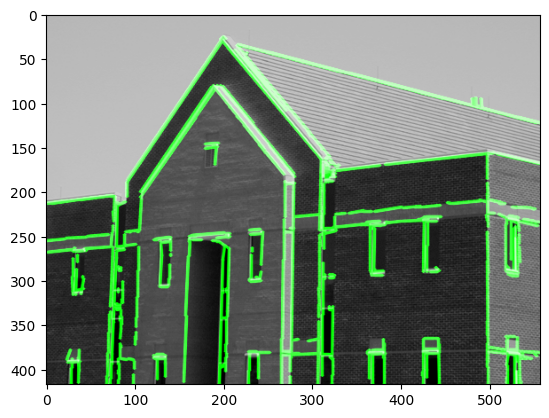

In [29]:
edges_image = res
image = dom_rgb

rho_resolution = 1
theta_resolution = np.pi/180
threshold = 10
minLineLength = 2
maxLineGap = 5


hough_lines = cv2.HoughLinesP(image=edges_image, rho=rho_resolution, theta=theta_resolution, threshold=threshold, minLineLength=minLineLength, maxLineGap=maxLineGap)
hough_lines_image = np.zeros_like(image)
draw_lines(hough_lines_image, hough_lines)
original_image_with_hough_lines = weighted_img(hough_lines_image,image)

plt.imshow(original_image_with_hough_lines, cmap='gray')